In [34]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [41]:
df = pd.read_csv('STP-20171124170718044.csv')
df.Data = pd.to_datetime(pd.Series(df.Data))

(118, 12)
(100, 9) 100 (100,)
(100, 3, 3) (100,) (18, 3, 3) (18,)
Train on 100 samples, validate on 18 samples
Epoch 1/200
1s - loss: 0.3719 - val_loss: 0.3697
Epoch 2/200
0s - loss: 0.3395 - val_loss: 0.3302
Epoch 3/200
0s - loss: 0.3086 - val_loss: 0.2912
Epoch 4/200
0s - loss: 0.2785 - val_loss: 0.2577
Epoch 5/200
0s - loss: 0.2501 - val_loss: 0.2300
Epoch 6/200
0s - loss: 0.2244 - val_loss: 0.2056
Epoch 7/200
0s - loss: 0.2025 - val_loss: 0.1894
Epoch 8/200
0s - loss: 0.1836 - val_loss: 0.1856
Epoch 9/200
0s - loss: 0.1665 - val_loss: 0.1858
Epoch 10/200
0s - loss: 0.1531 - val_loss: 0.1942
Epoch 11/200
0s - loss: 0.1456 - val_loss: 0.2060
Epoch 12/200
0s - loss: 0.1448 - val_loss: 0.2159
Epoch 13/200
0s - loss: 0.1484 - val_loss: 0.2235
Epoch 14/200
0s - loss: 0.1538 - val_loss: 0.2282
Epoch 15/200
0s - loss: 0.1581 - val_loss: 0.2301
Epoch 16/200
0s - loss: 0.1602 - val_loss: 0.2293
Epoch 17/200
0s - loss: 0.1598 - val_loss: 0.2265
Epoch 18/200
0s - loss: 0.1572 - val_loss: 0.222

0s - loss: 0.1218 - val_loss: 0.1524
Epoch 168/200
0s - loss: 0.1218 - val_loss: 0.1524
Epoch 169/200
0s - loss: 0.1218 - val_loss: 0.1524
Epoch 170/200
0s - loss: 0.1217 - val_loss: 0.1524
Epoch 171/200
0s - loss: 0.1217 - val_loss: 0.1523
Epoch 172/200
0s - loss: 0.1216 - val_loss: 0.1523
Epoch 173/200
0s - loss: 0.1215 - val_loss: 0.1526
Epoch 174/200
0s - loss: 0.1215 - val_loss: 0.1528
Epoch 175/200
0s - loss: 0.1215 - val_loss: 0.1531
Epoch 176/200
0s - loss: 0.1215 - val_loss: 0.1530
Epoch 177/200
0s - loss: 0.1215 - val_loss: 0.1527
Epoch 178/200
0s - loss: 0.1213 - val_loss: 0.1527
Epoch 179/200
0s - loss: 0.1212 - val_loss: 0.1527
Epoch 180/200
0s - loss: 0.1211 - val_loss: 0.1530
Epoch 181/200
0s - loss: 0.1211 - val_loss: 0.1533
Epoch 182/200
0s - loss: 0.1211 - val_loss: 0.1537
Epoch 183/200
0s - loss: 0.1211 - val_loss: 0.1543
Epoch 184/200
0s - loss: 0.1211 - val_loss: 0.1546
Epoch 185/200
0s - loss: 0.1212 - val_loss: 0.1546
Epoch 186/200
0s - loss: 0.1212 - val_loss: 0

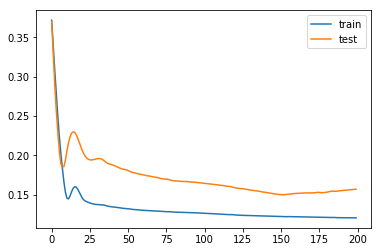

ValueError: operands could not be broadcast together with shapes (18,8) (3,) (18,8) 

In [50]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)

dataset = df[["IPCA", "IGPM", "SELIC"]]

values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_steps = 3
n_features = 3
# frame as supervised learning
reframed = series_to_supervised(scaled, n_steps, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train = 100
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
n_obs = n_steps * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_steps, n_features))
test_X = test_X.reshape((test_X.shape[0], n_steps, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_steps*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

array([[ 0.44,  0.5 ,  1.08],
       [ 0.44,  0.27,  0.87],
       [ 0.37,  0.34,  1.05],
       [ 0.25,  0.04,  0.94],
       [ 0.28,  0.04,  1.03],
       [ 0.28,  0.26,  0.91],
       [ 0.24,  0.28,  0.97],
       [ 0.47,  0.98,  0.99],
       [ 0.18,  1.29,  0.8 ],
       [ 0.3 ,  1.05,  0.93],
       [ 0.38,  0.69,  0.84],
       [ 0.74,  1.76,  0.84],
       [ 0.54,  1.09,  0.93],
       [ 0.49,  0.53,  0.8 ],
       [ 0.48,  0.74,  0.84],
       [ 0.55,  0.69,  0.9 ],
       [ 0.79,  1.61,  0.88],
       [ 0.74,  1.98,  0.96],
       [ 0.53,  1.76,  1.07],
       [ 0.28, -0.32,  1.02],
       [ 0.26,  0.11,  1.1 ],
       [ 0.45,  0.98,  1.18],
       [ 0.36,  0.38,  1.02],
       [ 0.28, -0.13,  1.12],
       [ 0.48, -0.44,  1.05],
       [ 0.55,  0.26,  0.86],
       [ 0.2 , -0.74,  0.97],
       [ 0.48, -0.15,  0.84],
       [ 0.47, -0.07,  0.77],
       [ 0.36, -0.1 ,  0.76],
       [ 0.24, -0.43,  0.79],
       [ 0.15, -0.36,  0.69],
       [ 0.24,  0.42,  0.69],
       [ 0

In [38]:
train

array([[ 0.12977867,  0.35294122,  0.24590163, ...,  0.        ,
         0.        ,  0.14889336],
       [ 0.14889336,  0.36764708,  0.24590163, ...,  0.        ,
         0.        ,  0.15995975],
       [ 0.15995975,  0.42647061,  0.22950819, ...,  0.        ,
         0.        ,  0.18209255],
       ..., 
       [ 0.        ,  0.32352942,  0.22950819, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.32352942,  0.16393442, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.33823532,  0.1967213 , ...,  0.        ,
         0.        ,  0.0362173 ]], dtype=float32)

In [40]:
len(test)

35039